<a href="https://colab.research.google.com/github/VDeshmukhCemtrex/Machine-Learning-Algorithms/blob/main/AdaBoost_with_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_circles

In [ ]:
np.random.seed(42)
X,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)


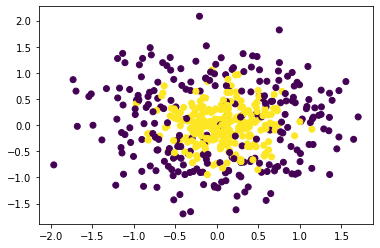

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
classifier = AdaBoostClassifier()
np.mean(cross_val_score(classifier,X,y,scoring='accuracy',cv=10))

0.786

In [ ]:
classifier.fit(X,y)

AdaBoostClassifier()

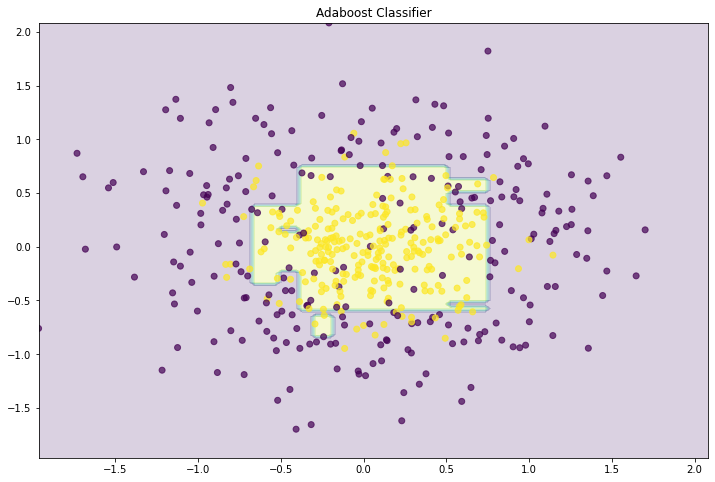

In [ ]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(classifier)

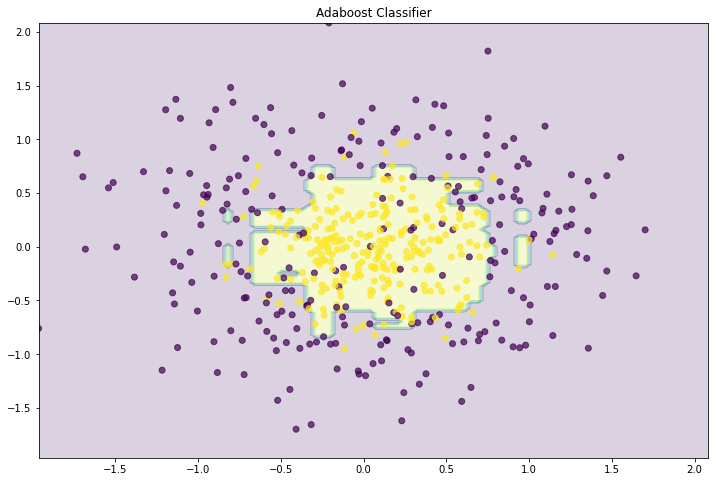

In [ ]:
classifier = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
classifier.fit(X,y)
plot_decision_boundary(classifier)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
